# MapReduce with PySpark

MapReduce is a programming model for processing large datasets with a parallel, distributed algorithm on a cluster. To demonstrate the MapReduce process step-by-step, we'll use a public dataset from Kaggle, such as the "US Accidents" dataset, which can be a good example to work with. Here's how you can perform MapReduce operations, typically using Python with the PySpark library, which provides an interface for programming entire clusters with implicit data parallelism and fault tolerance.

## Step 1: Setup and Load Data
First, install PySpark via pip.

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812364 sha256=7601ab581a4b5cba4677f4c1143c093c5ae8662b481153525f215b0bf9f0bcff
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


Then we will load the data into a PySpark DataFrame

In [2]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("USAccidentsAnalysis").getOrCreate()

# Load the data into a DataFrame
data = spark.read.csv("/kaggle/input/us-accidents/US_Accidents_March23.csv", header=True, inferSchema=True)
data.show(5)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/28 17:02:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/28 17:03:41 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+-------+--------+-------------------+-------------------+-----------------+------------------+-------+-------+------------+--------------------+--------------------+------------+----------+-----+----------+-------+----------+------------+-------------------+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+-----+--------+--------+--------+-------+-------+----------+-------+-----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
| ID| Source|Severity|         Start_Time|           End_Time|        Start_Lat|         Start_Lng|End_Lat|End_Lng|Distance(mi)|         Description|              Street|        City|    County|State|   Zipcode|Country|  Timezone|Airport_Code|  Weather_Timestamp|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Ameni

## Step 2: Understanding MapReduce

MapReduce consists of two main functions:

- **Map:** Processes each data element individually and transforms it into a key-value pair or another format that can be consumed by the Reduce step.
- **Reduce:** Aggregates the results of the Map operation, usually by a key.

## Step 3: Define a Map Function

For this example, let's count the **number of accidents per state**. 

First, we'll create a map function that maps each accident entry to a key-value pair where the key is the state and the value is 1 (indicating one accident).

In [3]:
def map_accidents_to_state(accident):
    return (accident['State'], 1)

## Step 4: Applying the Map Function

Apply the map function to the dataset to transform each accident record into a key-value pair.

In [4]:
rdd = data.rdd  # Convert DataFrame to RDD for MapReduce operations
mapped_rdd = rdd.map(map_accidents_to_state)

## Step 5: Define a Reduce Function

Now, we'll define a reduce function that sums up all values associated with the same key (state).

In [5]:
from operator import add

# Reduce function that sums up the accident counts per state
reduced_rdd = mapped_rdd.reduceByKey(add)

## Step 6: Collecting Results
Finally, we'll collect the results  and print them out or use them for further analysis.

In [6]:
results = reduced_rdd.collect()
for result in results:
    print(result)

('VA', 303301)
('SC', 382557)
('OK', 83647)
('KY', 32254)
('AL', 101044)
('UT', 97079)
('KS', 20992)
('ND', 3487)
('WV', 13793)
('IL', 168958)
('NJ', 140719)
('NY', 347960)
('CT', 71005)
('DE', 14097)
('LA', 149701)
('GA', 169234)
('AZ', 170609)
('TN', 167388)
('IA', 26307)
('WY', 3757)
('TX', 582837)
('NE', 28870)
('MI', 162191)
('ME', 2698)
('SD', 289)
('MO', 77323)
('NH', 10213)
('PA', 296620)
('OR', 179660)
('NM', 10325)
('CA', 1741433)
('RI', 16971)
('MN', 192084)
('OH', 118115)
('ID', 11376)
('NC', 338199)
('WI', 34688)
('NV', 21665)
('FL', 880192)
('MA', 61996)
('DC', 18630)
('CO', 90885)
('AR', 22780)
('VT', 926)
('MT', 28496)
('IN', 67224)
('MD', 140417)
('MS', 15181)
('WA', 108221)


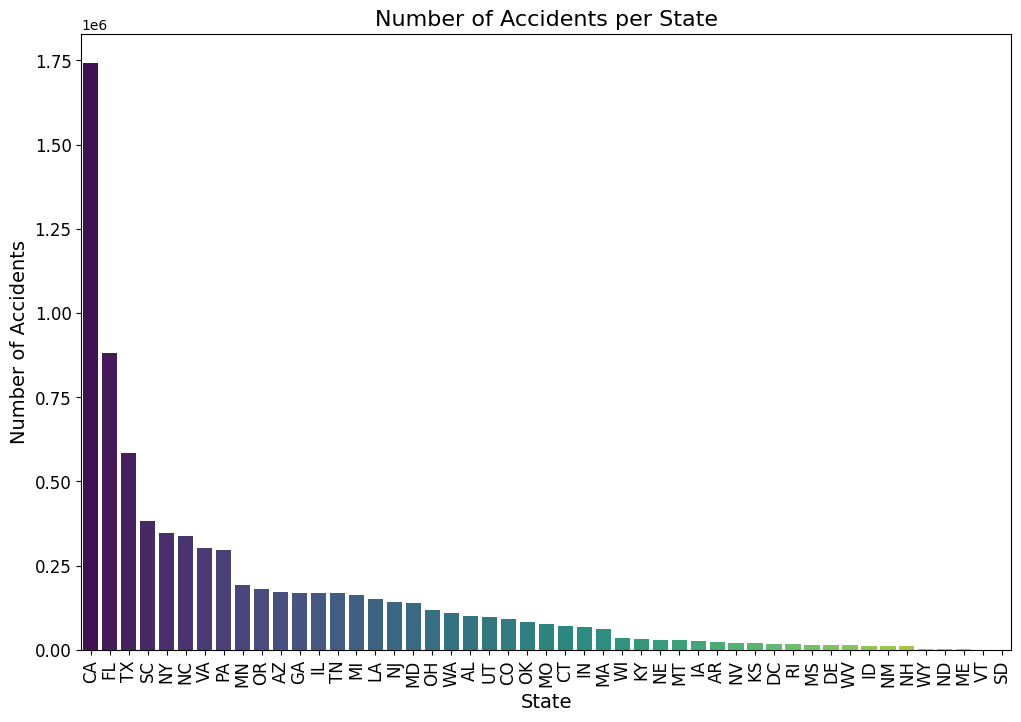

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results' is the list of tuples with (State, Accident Count)
# Convert the results to a Pandas DataFrame
df = pd.DataFrame(results, columns=['State', 'Accident Count'])

# Sort the DataFrame by Accident Count for better visualization
df = df.sort_values(by='Accident Count', ascending=False)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Accident Count', data=df, palette='viridis')

# Add labels and title
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.title('Number of Accidents per State', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  # Rotate state labels for readability
plt.yticks(fontsize=12)

# Show the plot
plt.show()